In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

In [6]:
####################IMPORT THE DATA

train =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train.columns = columns
test.columns = columns

In [8]:
####################Clean the Data

df = pd.concat([train, test], axis=0)
dff=df
k=df

df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [9]:
####################REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [10]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

df.drop('education', axis=1,inplace=True)

df.head()



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


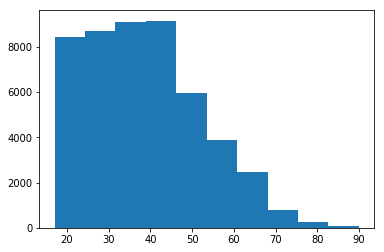

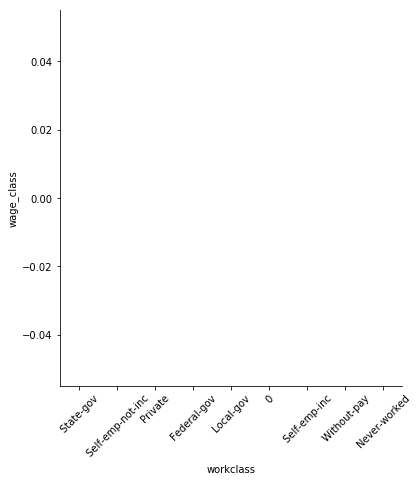

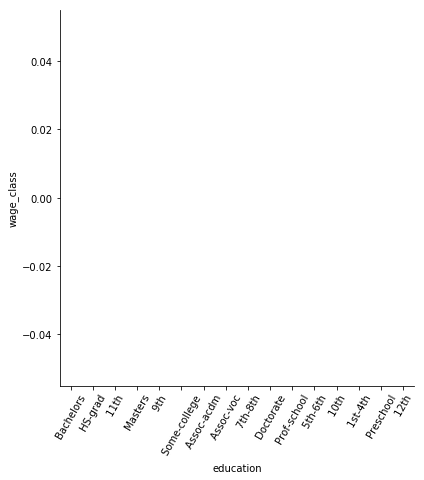

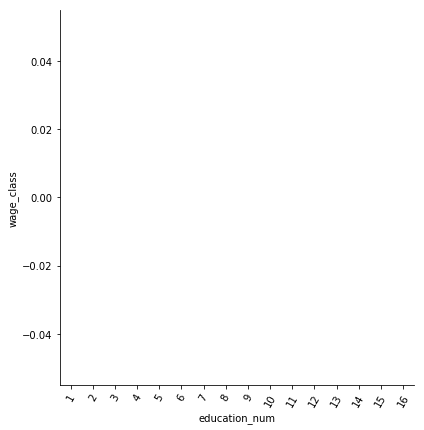

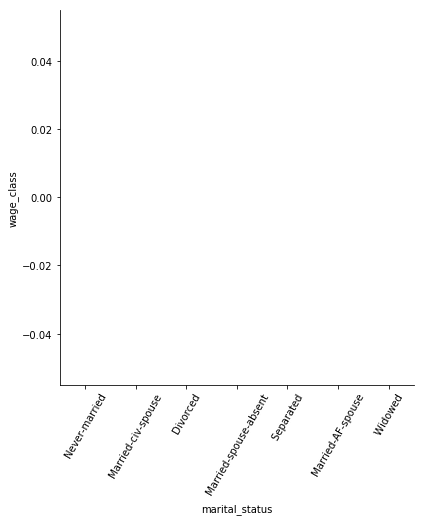

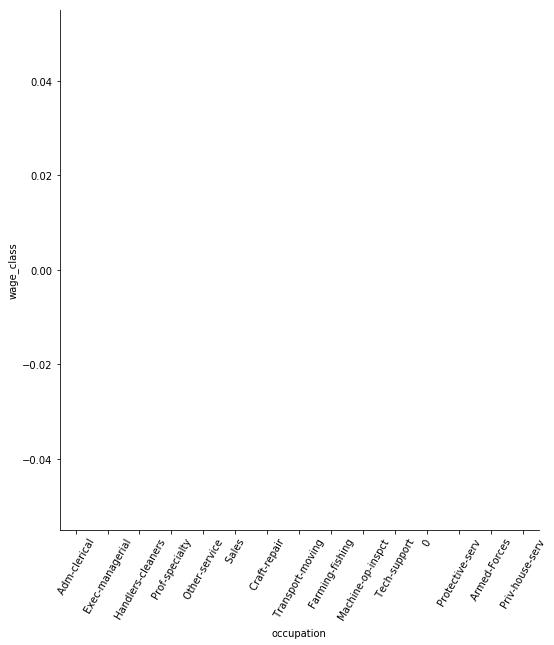

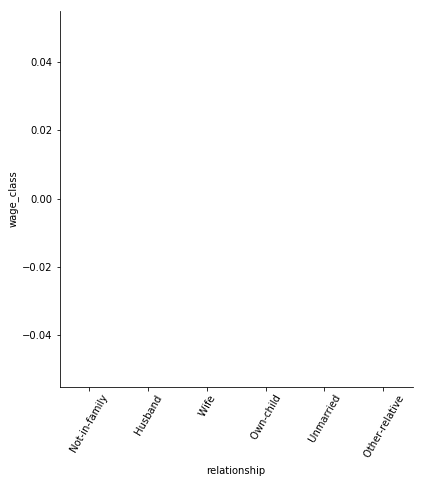

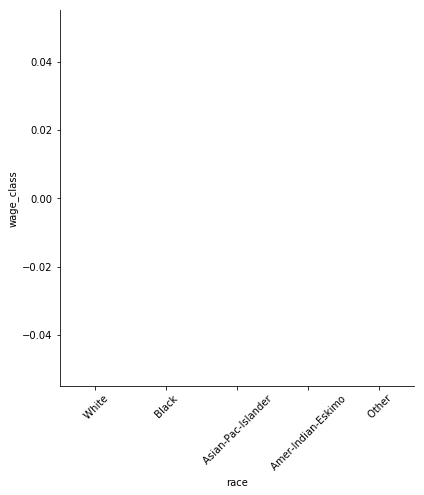

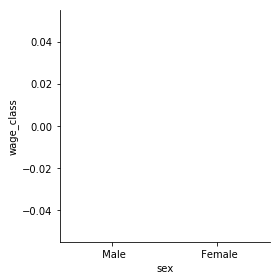

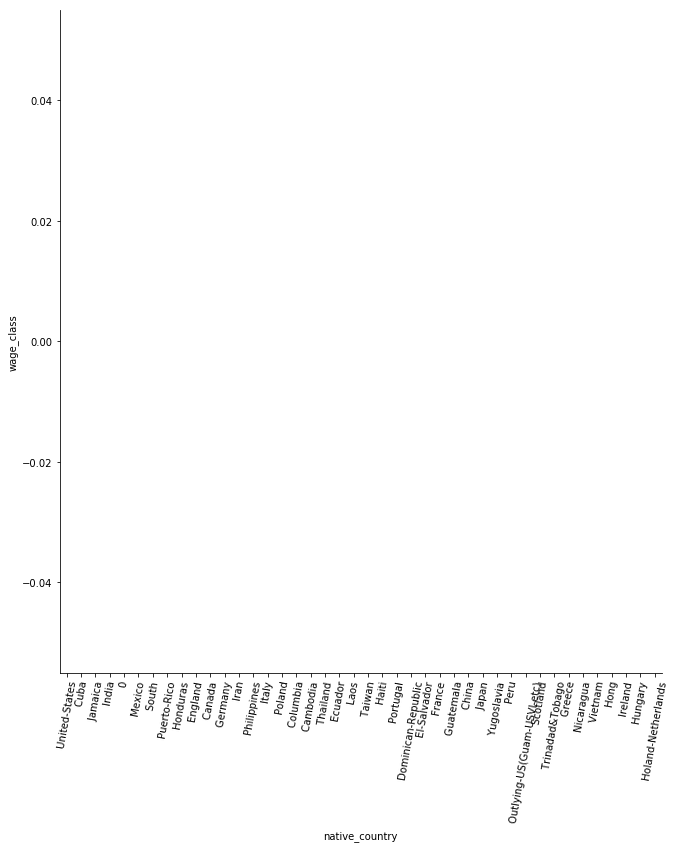

In [13]:
######################## Visualizations #############################
########################################### VISULIZATION ##################################################
###########################################################################################################
###########################################################################################################

plt.hist(dff['age']);

dff['wage_class'] = dff['wage_class'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)

###################################  WORKCLASS
dff.fillna(' 0', inplace=True)

sn.factorplot(x="workclass", y="wage_class", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['workclass'].value_counts()

########################################### EDUCATION
sn.factorplot(x="education",y="wage_class",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

#########################  EDUCATION NO
sn.factorplot(x="education_num",y="wage_class",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

################################ MARITAL status
sn.factorplot(x="marital_status",y="wage_class",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

################################ OCCUPATION
sn.factorplot(x="occupation",y="wage_class",data=dff,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

################################ Relationship
sn.factorplot(x="relationship",y="wage_class",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

################################ RACE
sn.factorplot(x="race",y="wage_class",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

################################ SEX
sn.factorplot(x="sex",y="wage_class",data=dff,kind="bar", size = 4, 
palette = "muted");
              
################################     Native county   
sn.factorplot(x="native_country",y="wage_class",data=dff,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);





In [14]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = preprocessing.scale(X)
y = np.array(df['wage_class'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [17]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#######################XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 



model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())


In [ ]:
XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))

#Accuracy is 0.8601